**Section I: Import the Data**

Imports and Read in File

In [91]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot') 

In [92]:
adult = pd.read_csv("../../assets/datasets/adult.csv")

**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

In [93]:
df = pd.DataFrame(data=adult, columns=['workclass', 'education-num', 'hours-per-week', 'income'])
df.head()

,workclass,education-num,hours-per-week,income
0,State-gov,13,40,small
1,Self-emp-not-inc,13,13,small
2,Private,9,40,small
3,Private,7,40,small
4,Private,13,40,small


Convert the categorical Data to numeric for our analysis. **HINT:** Refer to lesson 1.1 for writing a function of this sort

In [94]:
workclass = list(df['workclass'].unique())
workclass

['State-gov',
 'Self-emp-not-inc',
 'Private',
 'Federal-gov',
 'Local-gov',
 nan,
 'Self-emp-inc',
 'Without-pay',
 'Never-worked']

In [95]:
workclass_nums = {workclass:num for num, workclass in enumerate(workclass)}
workclass_nums

{nan: 5,
 'Federal-gov': 3,
 'Local-gov': 4,
 'Never-worked': 8,
 'Private': 2,
 'Self-emp-inc': 6,
 'Self-emp-not-inc': 1,
 'State-gov': 0,
 'Without-pay': 7}

In [96]:
df['workclass_numeric'] = df['workclass'].apply(lambda x: workclass_nums[x])

In [97]:
income = list(df['income'].unique())
income

['small', 'large', nan]

In [98]:
income_nums = {income:num for num, income in enumerate(income)}
income_nums

{nan: 2, 'large': 1, 'small': 0}

In [99]:
df['income_numeric'] = df['income'].apply(lambda x: income_nums[x])

In [100]:
df.head()

,workclass,education-num,hours-per-week,income,workclass_numeric,income_numeric
0,State-gov,13,40,small,0,0
1,Self-emp-not-inc,13,13,small,1,0
2,Private,9,40,small,2,0
3,Private,7,40,small,2,0
4,Private,13,40,small,2,0


Apply the functions you just wrote and append the results to the dataframe

In [101]:
# See above

**Section III: Examine the Data**

Plot the Data to see the distributions our our target markets; plot multiple indicators to see the relationships *IE: Education and Income*

After plotting, decide on how many clusters you want to start with. 

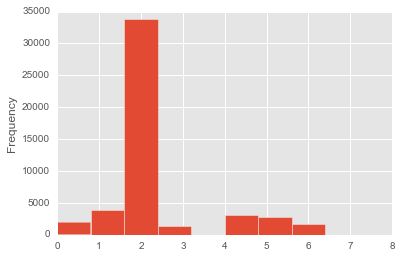

In [102]:
df['workclass_numeric'].plot(kind='hist',stacked=False);

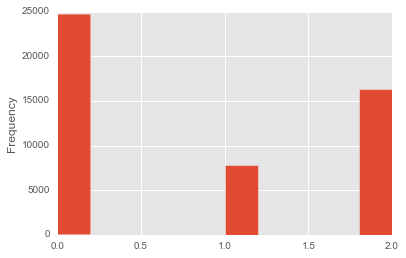

In [103]:
df['income_numeric'].plot(kind='hist',stacked=False);

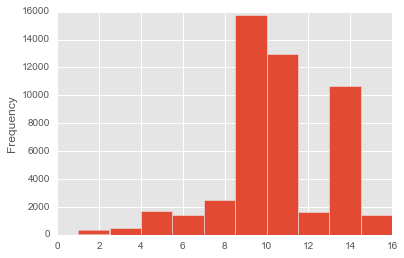

In [104]:
df['education-num'].plot(kind='hist',stacked=False);

**Section IV: Prepare for Clustering**

Create a New Dataframe with just numerical data for the analysis

In [113]:
df2 = pd.DataFrame(data = df, columns = ['workclass_numeric', 'income_numeric', 'education-num', 'hours-per-week'])
df3 = pd.DataFrame(data = df, columns = ['workclass_numeric', 'income_numeric'])

Check for NaN and Infinite Numbers - Our data is messy!

In [118]:
np.any(np.isnan(df3))

False

In [119]:
print len(df3)
df3.head(2)

48842


,workclass_numeric,income_numeric
0,0,0
1,1,0


Clean and scale your features

**Section V: Clustering Analysis**

Cluster the Data to our our target groups. **BONUS**: Perform multiple clustering tests on various indicator variables

In [121]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df3)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Get the labels and centroids

In [124]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [125]:
labels

array([0, 0, 0, ..., 1, 1, 2], dtype=int32)

In [126]:
centroids

array([[  1.85211535e+00,  -1.69864123e-13],
       [  1.83709011e+00,   1.68099716e+00],
       [  4.82130270e+00,   8.64116956e-01]])

Compute the Silhoutte Score, AMI and inertia to measure your analysis

In [ ]:
colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

Calculate the precision, recall and F1 score

Plot your confusion matrix

Segment your dataframe by the new cluster labels. Create scatterplots that show your clusters in different colors 

### Section VI: Interpreting your clusters
Look at your scatterplots. See how each of the clusters breakdown. Come up with descriptions for each of the clusters you've created based on the relevant census variables.